# JIT Exercise

Use `jit` (either in function or decorator form) to speed up the Mandelbrot code below, then time and compare the results

In [1]:
from numba import jit
import numpy

from matplotlib import pyplot, cm
%matplotlib inline

In [2]:
def mandel(x, y, max_iters):
    i = 0
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z * z + c
        if (z.real * z.real + z.imag * z.imag) >= 4:
            return i

    return 255

def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

    return image

In [6]:
import time
start = time.perf_counter()
image = numpy.zeros((500 * 2, 750 * 2), dtype=numpy.uint8)
image = create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)
end = time.perf_counter()
print("Duree = ", end-start," secondes")

Duree =  8.193807659000413  secondes


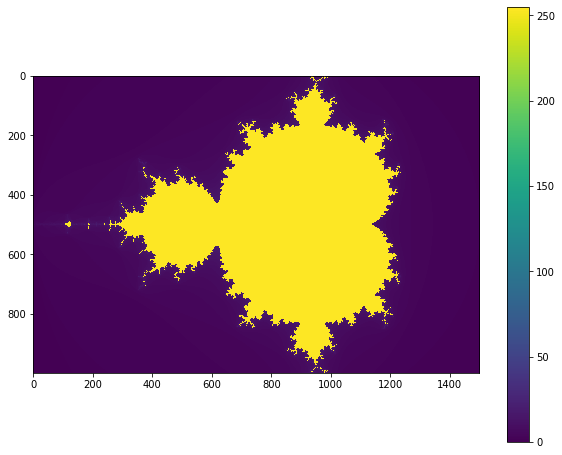

In [5]:
pyplot.figure(figsize=(10,8))
pyplot.imshow(image, cmap=cm.viridis)
pyplot.colorbar();

In [10]:
#using jit method
from numba import jit
import numpy

from matplotlib import pyplot, cm
%matplotlib inline




In [11]:
@jit(nopython=True)
def mandel(x, y, max_iters):
    i = 0
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z * z + c
        if (z.real * z.real + z.imag * z.imag) >= 4:
            return i

    return 255

def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

    return image

In [12]:
import time
start = time.perf_counter()
image = numpy.zeros((500 * 2, 750 * 2), dtype=numpy.uint8)
image = create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)
end = time.perf_counter()
print("Duree = ", end-start," secondes")


Duree =  1.7892067380007575  secondes


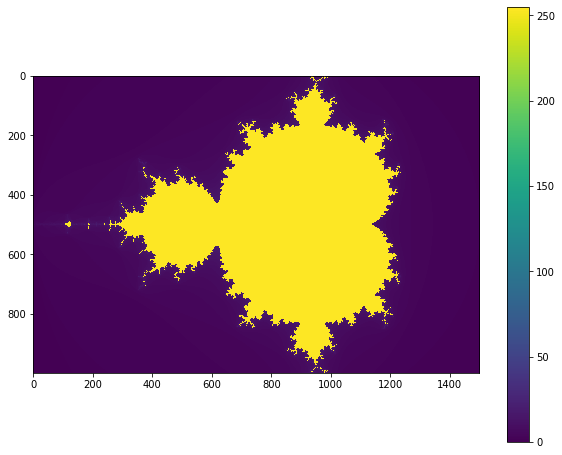

In [13]:
pyplot.figure(figsize=(10,8))
pyplot.imshow(image, cmap=cm.viridis)
pyplot.colorbar();

In [ ]:
compare the results:
as we can see : when we speed up the Mandelbrot code without jit it took Duree =  8.193807659000413  secondes
but when we use jit it took only Duree =  1.7892067380007575  secondes
so jit is faster it is a high performance python compiler.
